# Import plaintext

In [1]:
from tqdm.notebook import trange
NumTraces = 500

In [2]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../joules-swaes-picochip").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [3]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))

500
16


# Import key

In [4]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (NumTraces):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)
print(len(key_array))
print(len(key_array[0]))

500
16


# Import traces

In [5]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../joules-swaes-picochip/report_400samples/*.data"  #### edit here
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                strx.append(row[-2])
                stry.append(row[-1])
            if a == 399:  #### edit here, crop the extra points 
                break
                
for i in range (len(stry)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))

500
400


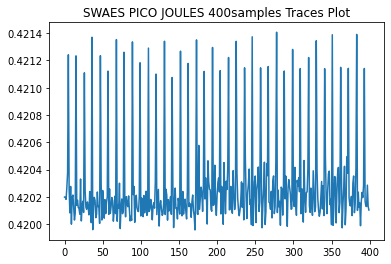

In [7]:
plt.plot(trace_array_y[0])
plt.title('SWAES PICO JOULES 400samples Traces Plot')
plt.savefig('joules_swaes_400samples_trace.jpg',dpi=100) # save jpg/png

In [8]:
trace_array_y = np.array(trace_array_y)
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

500
500
500
400


# SBox

In [10]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [57]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = [0xf0, 0xde, 0xbc, 0x9a, 0x78, 0x56, 0x34, 0x12, 0xef, 0xcd, 0xab, 0x89, 0x67, 0x45, 0x23, 0x01]

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
            #st1 = pt_array[tnum][bnum] ^ kguess
            #st2 = sbox[st1]
            #hyp[tnum] = st1 ^ st2

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely B6 (actual F0)
 Top 5 guesses: 
   B6 - Diff = 0.976150
   E0 - Diff = 0.956473
   66 - Diff = 0.945849
   F0 - Diff = 0.944319
   01 - Diff = 0.944115




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 07 (actual DE)
 Top 5 guesses: 
   07 - Diff = 0.961165
   42 - Diff = 0.955733
   AF - Diff = 0.953676
   C0 - Diff = 0.943836
   3F - Diff = 0.942854




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.983937
   6E - Diff = 0.952357
   D8 - Diff = 0.947685
   3D - Diff = 0.945920
   86 - Diff = 0.941473




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely C6 (actual 9A)
 Top 5 guesses: 
   C6 - Diff = 0.960814
   03 - Diff = 0.960184
   C1 - Diff = 0.954216
   FF - Diff = 0.945237
   6A - Diff = 0.943452




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 78 (actual 78)
 Top 5 guesses: 
   78 - Diff = 0.991210
   DE - Diff = 0.955000
   17 - Diff = 0.940988
   ED - Diff = 0.939072
   9A - Diff = 0.938531




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely A4 (actual 56)
 Top 5 guesses: 
   A4 - Diff = 0.961662
   8B - Diff = 0.958842
   FB - Diff = 0.948649
   88 - Diff = 0.942729
   CC - Diff = 0.940190




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 34 (actual 34)
 Top 5 guesses: 
   34 - Diff = 0.972324
   33 - Diff = 0.971206
   BD - Diff = 0.970481
   69 - Diff = 0.966273
   5B - Diff = 0.949768




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 25 (actual 12)
 Top 5 guesses: 
   25 - Diff = 0.966822
   12 - Diff = 0.964718
   30 - Diff = 0.956347
   6C - Diff = 0.944449
   45 - Diff = 0.940030




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely C2 (actual EF)
 Top 5 guesses: 
   C2 - Diff = 0.961100
   37 - Diff = 0.957714
   A0 - Diff = 0.956348
   66 - Diff = 0.953423
   CF - Diff = 0.947822




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely CD (actual CD)
 Top 5 guesses: 
   CD - Diff = 0.970995
   FA - Diff = 0.964518
   90 - Diff = 0.961670
   E0 - Diff = 0.957902
   D0 - Diff = 0.948662




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely 96 (actual AB)
 Top 5 guesses: 
   96 - Diff = 0.972930
   AB - Diff = 0.972164
   53 - Diff = 0.970249
   36 - Diff = 0.957886
   F9 - Diff = 0.952750




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 6E (actual 89)
 Top 5 guesses: 
   6E - Diff = 0.969353
   01 - Diff = 0.961254
   0F - Diff = 0.954845
   1F - Diff = 0.950996
   DC - Diff = 0.949391




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 7D (actual 67)
 Top 5 guesses: 
   7D - Diff = 0.954609
   E1 - Diff = 0.941631
   F5 - Diff = 0.941130
   A4 - Diff = 0.933994
   09 - Diff = 0.927159




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely FF (actual 45)
 Top 5 guesses: 
   FF - Diff = 0.959415
   6B - Diff = 0.956517
   4C - Diff = 0.955593
   53 - Diff = 0.952870
   B3 - Diff = 0.949000




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 3A (actual 23)
 Top 5 guesses: 
   3A - Diff = 0.948661
   14 - Diff = 0.946605
   F6 - Diff = 0.946344
   34 - Diff = 0.943808
   5F - Diff = 0.939851




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 98 (actual 01)
 Top 5 guesses: 
   98 - Diff = 0.955717
   1E - Diff = 0.951181
   BC - Diff = 0.947361
   60 - Diff = 0.946165
   A2 - Diff = 0.945813




# How Many Traces Needed for Method 1

In [11]:
traces_enc_full = trace_array_y

In [12]:
len(traces_enc_full[0])

400

In [13]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [15]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
pt = []
known_key = key_array[0]

for traces in trange(5,80,5): ## edit here
    x = np.arange(5, 80, 5)  ###########3 edit the x here !!!!!
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/15 [00:00<?, ?it/s]

<ipython-input-15-0b252545c78e>:50: RuntimeWarning: invalid value encountered in true_divide
  cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)


For  5 traces, correct key byte are  0


For 10 traces, correct key byte are  1


For 15 traces, correct key byte are  5


For 20 traces, correct key byte are  7


For 25 traces, correct key byte are  9


For 30 traces, correct key byte are 13


For 35 traces, correct key byte are 13


For 40 traces, correct key byte are 15


For 45 traces, correct key byte are 15


For 50 traces, correct key byte are 15


For 55 traces, correct key byte are 16


For 60 traces, correct key byte are 16


For 65 traces, correct key byte are 16


For 70 traces, correct key byte are 16


For 75 traces, correct key byte are 16




# CPA Number of traces vs. correctly guessed key bytes

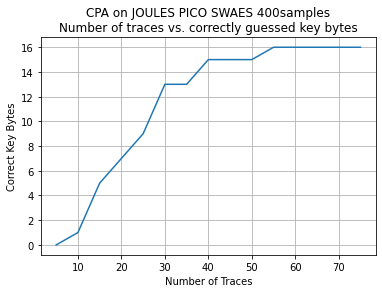

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for600sample-Copy1 further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('CPA on JOULES PICO SWAES 400samples\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('400s_correct_bytes_vs_traces.jpg',dpi=100) # save jpg/png

# Plot for the correlation vs traces 

In [17]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_cpa_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = full_cpa_list[i][subkey][guess]
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

15
16
1
15
16
255


In [18]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [19]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

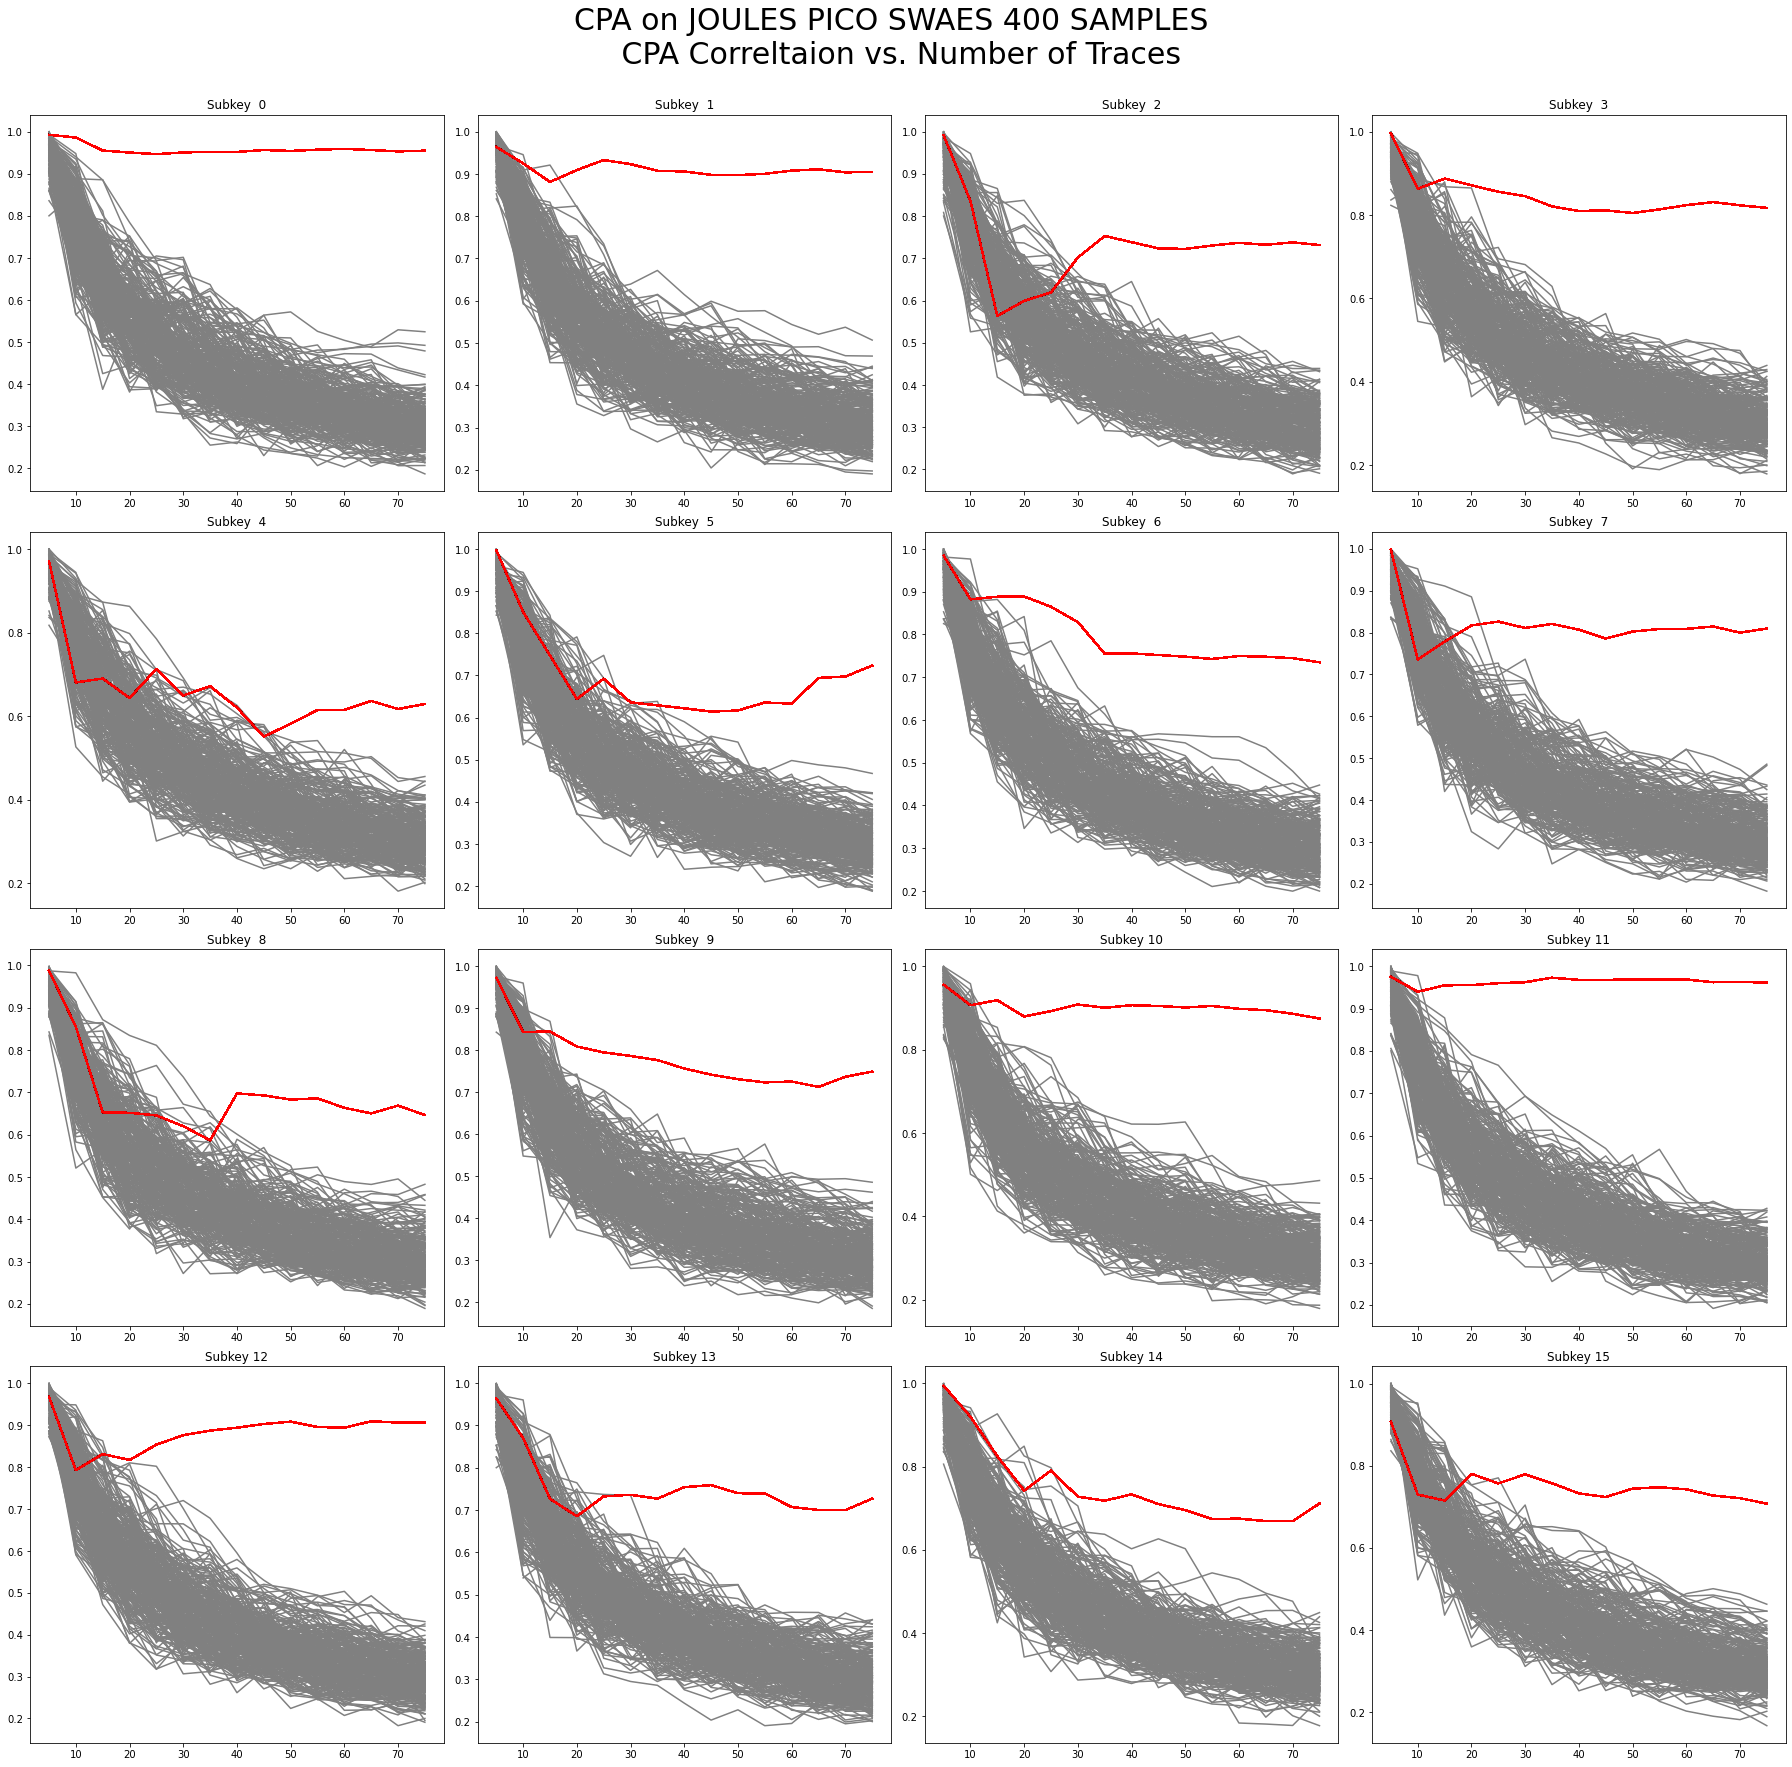

In [20]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        plt.title('Subkey %2d' %(subkey))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA on JOULES PICO SWAES 400 SAMPLES \n CPA Correltaion vs. Number of Traces', size=30)

plt.savefig('400s_corr_vs_traces.jpg',dpi=100)  
            
plt.show()

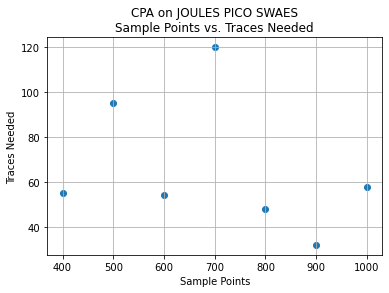

In [26]:
x_axis_sample_points = [400,500,600,700,800,900,1000]
y_how_many_traces_needed_to_attack = [55,95,54,120,48,32,58]
plt.scatter(x_axis_sample_points, y_how_many_traces_needed_to_attack)
plt.grid()
plt.xlabel('Sample Points')
plt.ylabel('Traces Needed')
############################################## edit here
plt.title('CPA on JOULES PICO SWAES\nSample Points vs. Traces Needed')
plt.savefig('Sample Points vs. Traces Needed.jpg',dpi=100) # save jpg/png